In [8]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

In [9]:
df = pd.read_csv("D:\IBM_Employee_Attrition.csv")
print("No. of employees who leave: {}".format(len(df[df["Attrition"] == "Yes"])))
print("No. of employees who stay: {}".format(len(df[df["Attrition"] == "No"])))

df["Attrition"] = df.apply(lambda row: 1 if row["Attrition"] == "Yes" else 0, axis=1)
df["BusinessTravel"] = df.apply(lambda row:1 if row["BusinessTravel"] == "Travel_Frequently" \
                                else 0, axis=1)
df["Department_Sales"] = df.apply(lambda row:1 if row["Department"] == "Sales" else 0, axis=1)
df["Department_RD"] = df.apply(lambda row:1 if row["Department"] == "Research & Development" \
                               else 0, axis=1)
df["Education"] = df.apply(lambda row: 1 if row["Education"] >= 3 else 0, axis=1)
df["EducationField"] = df.apply(lambda row: 1 if row["EducationField"] == "Life Sciences" \
                                or row["EducationField"] == "Medical" \
                                or row["EducationField"] == "Technical Degree" else 0, axis = 1)
df["Gender"] = df.apply(lambda row: 1 if row["Gender"] == "Male" else 0, axis=1)
df["JobInvolvement"] = df.apply(lambda row: 1 if row["JobInvolvement"] >= 3 else 0, axis=1)
df["JobLevel"] = df.apply(lambda row: 1 if row["JobLevel"] >= 3 else 0, axis=1)
df["JobRole"] = df.apply(lambda row:1 if row["JobRole"] == "Laboratory Technician" \
                         or row["JobRole"] == "Research Scientist" else 0, axis=1)
df["MaritalStatus"] = df.apply(lambda row:1 if row["MaritalStatus"] == "Married" else 0, axis=1)
df["OverTime"] = df.apply(lambda row:1 if row["OverTime"] == "Yes" else 0, axis=1)
df["StockOptionLevel"] = df.apply(lambda row:1 if row["StockOptionLevel"] != 0 else 0, axis=1)

No. of employees who leave: 237
No. of employees who stay: 1233


In [10]:
features = df[["Age", "BusinessTravel", "Department_Sales", "Department_RD", "DistanceFromHome", \
               "Education", "EducationField", "EnvironmentSatisfaction", "Gender", \
               "JobInvolvement", "JobLevel", "JobRole", "JobSatisfaction", "MaritalStatus", \
               "MonthlyIncome", "NumCompaniesWorked", "OverTime", "PercentSalaryHike", \
               "PerformanceRating", "RelationshipSatisfaction", "StockOptionLevel", \
               "TotalWorkingYears", "TrainingTimesLastYear", "WorkLifeBalance", "YearsAtCompany", \
               "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager"]]
attrition = df["Attrition"]
print(features.head())
print(attrition.iloc[:5])

   Age  BusinessTravel  Department_Sales  Department_RD  DistanceFromHome  \
0   41               0                 1              0                 1   
1   49               1                 0              1                 8   
2   37               0                 0              1                 2   
3   33               1                 0              1                 3   
4   27               0                 0              1                 2   

   Education  EducationField  EnvironmentSatisfaction  Gender  JobInvolvement  \
0          0               1                        2       0               1   
1          0               1                        3       1               0   
2          0               0                        4       1               0   
3          1               1                        4       0               1   
4          0               1                        1       1               1   

   ...  PerformanceRating  RelationshipSatisfactio

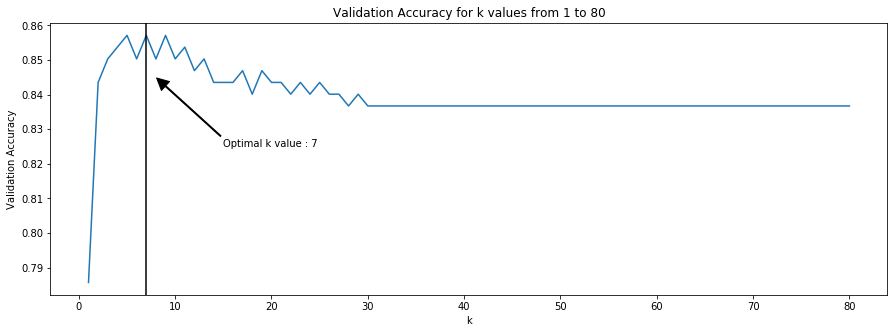

In [11]:
features_train, features_test, attrition_train, attrition_test = \
train_test_split(features, attrition, train_size = 0.8, test_size = 0.2, random_state = 6)

scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)

accuracies = []
for k in range(1,81):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(features_train, attrition_train)
    accuracies.append(classifier.score(features_test, attrition_test))

k_list = range(1, 81)
plt.figure(figsize=(15,5))
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.axvline(7, color="black")
plt.annotate("Optimal k value : 7", xy=(8, 0.845), xytext=(15, 0.825), \
             arrowprops=dict(facecolor="black", width=1, shrink=0.01))
plt.title("Validation Accuracy for k values from 1 to 80")
plt.show()


In [12]:
classifier = KNeighborsClassifier(n_neighbors = 7)
classifier.fit(features_train, attrition_train)
print("Score on training data: {:.4f}".format(classifier.score(features_train, attrition_train)))
print("Score on testing data: {:.4f}".format(classifier.score(features_test, attrition_test)))

Alan = np.array([24.0, 0.0, 0.0, 1.0, 10.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 4.0, 0.0, 2500.0, \
                 1.0, 1.0, 0.0, 2.0, 2.0, 0.0, 2.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0])
Ben = np.array([49.0, 1.0, 1.0, 0.0, 15.0, 1.0, 0.0, 4.0, 1.0, 3.0, 1.0, 1.0, 3.0, 0.0, 3500.0, \
                3.0, 1.0, 5.0, 2.0, 4.0, 0.0, 25.0, 2.0, 2.0, 15.0, 15.0, 8.0, 3.0])
Chloe = np.array([60.0, 0.0, 0.0, 0.0, 8.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 4.0, 1.0, 4800.0, \
                  2.0, 1.0, 1.0, 3.0, 4.0, 0.0, 37.0, 3.0, 4.0, 30.0, 20.0, 10.0, 20.0])
Denise = np.array([40.0, 1.0, 1.0, 0.0, 12.0, 1.0, 0.0, 4.0, 0.0, 1.0, 1.0, 0.0, 4.0, 1.0, 8000.0, \
                   0.0, 0.0, 10.0, 4.0, 3.0, 1.0, 18.0, 2.0, 2.0, 18.0, 9.0, 7.0, 3.0])
sample_employees = np.array([Alan, Ben, Chloe, Denise])
sample_employees = scaler.transform(sample_employees)
print(classifier.predict(sample_employees))
print(classifier.predict_proba(sample_employees))

Score on training data: 0.8631
Score on testing data: 0.8571
[0 0 0 0]
[[0.71428571 0.28571429]
 [0.71428571 0.28571429]
 [0.85714286 0.14285714]
 [1.         0.        ]]
